In [1]:
from astropy.io import fits
import numpy as np
from glob import glob
import pandas as pd
import spectral_index as spec
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Open images
filepath = '.'

dat_files = glob(filepath + '/vlass_sample/*.tt0.subim.fits')
rms_files = glob(filepath + '/vlass_sample/*.tt0.rms.subim.fits')

# Open minimum frequency image
im  = np.squeeze(fits.open(dat_files[7])[0].data)
err = np.squeeze(fits.open(rms_files[7])[0].data)
   
header = fits.open(dat_files[7])[0].header

In [3]:
# Run Object detection algorithm on the lowest Frequency image.

# Define a threshold to identify objects from.
# In this case I chose to set the threshold at 10 sigma over the image's mean value.
sigma = 10

# The algorithm will use a search window that iteratively passes over the image. 
# If pixels are found over the above threshold, a centroiding algorithm will be run to extract the object's center.
#
# The Search window should be large enough to capture an object, 
# but not so large that it will capture several objects in a single frame.
x_win, y_win = 200, 200

# The code will write a table with object positions to the given filepath.
# If a header with wcs information is provided, the code will calculate the RA and Dec of the objects.
# If fig = True, an image with the identified objects overlaid will be produced.

spec.findobj.finder(image = im, sigma = sigma, x_win = x_win, y_win = y_win, outpath = filepath, header=header, fig=True)

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [4]:
# Display the table
table = pd.read_csv('objects.csv', delimiter=',', index_col=0)
print(table)

     objid       xcoord       ycoord         ra        dec
0    obj-1   262.706667  1330.373333  53.708420 -36.793943
1    obj-2   217.474820  5061.330935  53.713038 -36.172079
2    obj-3   699.942857   753.628571  53.618046 -36.890480
3    obj-4   803.800000  2446.600000  53.594647 -36.608406
4    obj-5   817.444444  5595.333333  53.588630 -36.083631
5    obj-6   815.700000  5600.600000  53.588985 -36.082752
6    obj-7  1725.087838  5259.054054  53.401647 -36.140271
7    obj-8  2214.952381  4122.666667  53.300992 -36.329868
8    obj-9  2456.787037   543.212963  53.251995 -36.926514
9   obj-10  2633.516129   389.741935  53.215182 -36.952128
10  obj-11  2636.000000  3715.500000  53.213969 -36.397831
11  obj-12  2645.231481  5251.990741  53.211750 -36.141749
12  obj-13  2825.952381  2430.079365  53.174795 -36.612093
13  obj-14  3097.515625   468.328125  53.118411 -36.939069
14  obj-15  4362.605263  2651.355263  52.855858 -36.574941
15  obj-16  4553.894737  3096.543860  52.816448 -36.5006

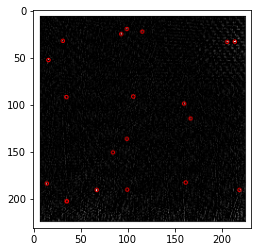

In [5]:
# Display the image
img = mpimg.imread(filepath+'/field.png')
plt.imshow(img)

In [6]:
# Extract fluxes from the identified objects.

# The code will loop over each frequency frame and each object identified and extract the flux
# for each object at each frequency. 

# first define a list of files to loop over. Each file should be an image taken at a different frequency.
files = dat_files

# The provide the table of the objects with their coordinates
table = pd.read_csv('objects.csv', delimiter=',', index_col=0)

# Define the radius of the circular aperture to extract the fluxes from
radius = 50

# The code will write tables containing the frequencies and fluxes for each object.
# Provide a filepath to save these table to.
outpath = filepath + '/objects'
if not os.path.exists(outpath):
    os.makedirs(outpath)

spec.extract_flux.extract_objects(files = files, table = table, radius = radius, outpath = outpath)


Table written to ./objects/obj-1.csv


Table written to ./objects/obj-2.csv


Table written to ./objects/obj-3.csv


Table written to ./objects/obj-4.csv


Table written to ./objects/obj-5.csv


Table written to ./objects/obj-6.csv


Table written to ./objects/obj-7.csv


Table written to ./objects/obj-8.csv


Table written to ./objects/obj-9.csv


Table written to ./objects/obj-10.csv


Table written to ./objects/obj-11.csv


Table written to ./objects/obj-12.csv


Table written to ./objects/obj-13.csv


Table written to ./objects/obj-14.csv


Table written to ./objects/obj-15.csv


Table written to ./objects/obj-16.csv


Table written to ./objects/obj-17.csv


Table written to ./objects/obj-18.csv


Table written to ./objects/obj-19.csv


Table written to ./objects/obj-20.csv



In [8]:
# example of the flux/frequency table for an individual object
ff = pd.read_csv(outpath+'/obj-1.csv', delimiter=',', index_col=0)
print(ff)

       frequency          flux
0   3.308007e+09   6451.352935
1   2.412005e+09  17333.243388
2   2.156004e+09  23178.419305
3   2.796006e+09  12489.795790
4   3.564007e+09   5578.265733
5   3.436007e+09   9829.790026
6   2.284005e+09  22296.655523
7   2.028004e+09  28612.587885
8   2.924006e+09  10409.093617
9   3.692008e+09   4701.558450
10  3.052006e+09   8933.495359
11  2.668005e+09  15331.806541
12  3.820008e+09   3189.648200
13  3.180007e+09   7363.466488
14  2.540005e+09  20183.995330
15  3.948008e+09   1694.520146


In [7]:
# Derive Spectral indices from the extracted fluxes and frequencies.

# Give the path the the table of object positions. The code will append Spectral indices to the table.
tablepath = 'objects.csv'

# Give the path to the files containing the fluxes and frequencies for the individual objects.
objectpath = filepath+'/objects/'

# Toggling fig=True will print SED's for each object

spec.derive_specind.derive(tablepath=tablepath, objectpath=objectpath, fig=True)


Spectral indices added to objects.csv


In [9]:
# Print the object table again.
table = pd.read_csv('objects.csv', delimiter=',', index_col=0)
print(table)

     objid       xcoord       ycoord         ra        dec     alpha
0    obj-1   262.706667  1330.373333  53.708420 -36.793943 -3.497495
1    obj-2   217.474820  5061.330935  53.713038 -36.172079 -3.381606
2    obj-3   699.942857   753.628571  53.618046 -36.890480 -1.502150
3    obj-4   803.800000  2446.600000  53.594647 -36.608406 -4.350426
4    obj-5   817.444444  5595.333333  53.588630 -36.083631 -2.975892
5    obj-6   815.700000  5600.600000  53.588985 -36.082752 -3.583299
6    obj-7  1725.087838  5259.054054  53.401647 -36.140271 -4.076072
7    obj-8  2214.952381  4122.666667  53.300992 -36.329868 -3.151102
8    obj-9  2456.787037   543.212963  53.251995 -36.926514 -2.500834
9   obj-10  2633.516129   389.741935  53.215182 -36.952128 -5.352066
10  obj-11  2636.000000  3715.500000  53.213969 -36.397831 -5.056573
11  obj-12  2645.231481  5251.990741  53.211750 -36.141749 -2.809137
12  obj-13  2825.952381  2430.079365  53.174795 -36.612093 -4.710442
13  obj-14  3097.515625   468.3281

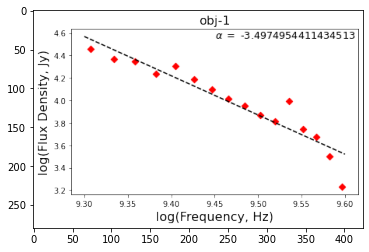

In [10]:
# Show an example of an SED
img = mpimg.imread(outpath+'/obj-1.png')
plt.imshow(img)